In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten

In [4]:
def process_data(timeseries,group):
    X,y = [],[]
    for i in range(len(timeseries)):
        end_ix = i+group
        if end_ix > len(timeseries)-1:
            break
        seq_x, seq_y = timeseries[i:end_ix],timeseries[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X),np.array(y)

In [38]:
timeseries = [110,125,133,146,158,172,187,196,210]

group = 3
X,y = process_data(timeseries,group)

In [39]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [40]:
X.shape

(6, 3)

In [41]:
y.shape

(6,)

In [42]:
n_feature = 1
X = X.reshape((X.shape[0],X.shape[1],n_feature))

In [43]:
X.shape

(6, 3, 1)

## Building LSTM Model

In [44]:
model = Sequential()
model.add(LSTM(50,input_shape=(group,n_feature),
               activation='relu',return_sequences=True))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))

In [45]:
model.compile(optimizer = 'adam',loss = 'mse')
model.fit(X,y,epochs=200,verbose=0)

In [46]:
x_input = np.array([187,196,210])
temp_input = list(x_input)
lstoutput = []
i=0;
while(i<10):
    if(len(temp_input)>3):
        x_input = np.array(temp_input[1:])
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape((1,group,n_feature))
        yhat = model.predict(x_input,verbose=0)
        print('{} day outut {}'.format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lstoutput.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1,group,n_feature))
        yhat = model.predict(x_input,verbose=0)
        temp_input.append(yhat[0][0])
        lstoutput.append(yhat[0][0])
        i+=1
print(lstoutput)
[110,125,133,146,158,172,187,196,210]

1 day input [196.         210.         229.75874329]
1 day outut [[241.77779]]
2 day input [210.         229.75874329 241.77778625]
2 day outut [[259.36752]]
3 day input [229.75874 241.77779 259.36752]
3 day outut [[279.45364]]
4 day input [241.77779 259.36752 279.45364]
4 day outut [[296.01053]]
5 day input [259.36752 279.45364 296.01053]
5 day outut [[316.98672]]
6 day input [279.45364 296.01053 316.98672]
6 day outut [[339.11426]]
7 day input [296.01053 316.98672 339.11426]
7 day outut [[360.619]]
8 day input [316.98672 339.11426 360.619  ]
8 day outut [[385.37524]]
9 day input [339.11426 360.619   385.37524]
9 day outut [[411.19006]]
[229.75874, 241.77779, 259.36752, 279.45364, 296.01053, 316.98672, 339.11426, 360.619, 385.37524, 411.19006]


[110, 125, 133, 146, 158, 172, 187, 196, 210]

## Visualising Data

In [49]:
old_day = np.arange(1,10)
new_day = np.arange(10,20)

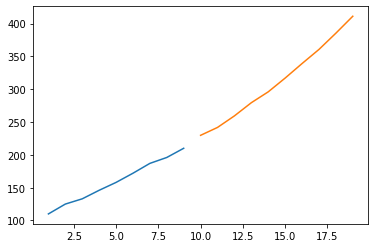

In [50]:
plt.plot(old_day,timeseries)
plt.plot(new_day,lstoutput)